## **Hand Written Digit Classification**
### Objective: The main objective of the project is to classify hand written digits / numbers using Pandas, NumPy and Matplotlib libraries provided and supported in python programming languages.

### Data Source: The data is sourced form YBI github and video referrence is taken from:https://youtu.be/UD6co1HVpO4?list=PLl3P-U08ZvwmeT3yy7Yau5bNJo09SAu3G

## Import Library

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

## Import Data

In [5]:
from sklearn.datasets import load_digits

In [6]:
df= load_digits()

## Describe Data

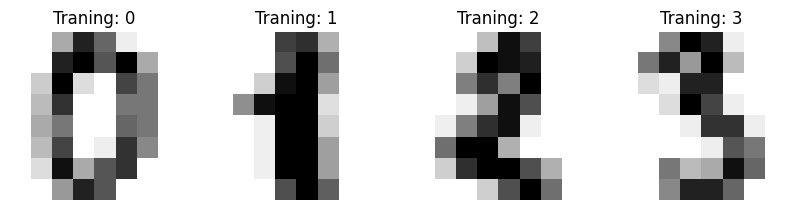

In [7]:
_, axes= plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Traning: %i" %label)

## Data Visualization

In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
df.images[0].shape

(8, 8)

In [12]:
len(df.images)

1797

## Data Preprocessing

In [14]:
n_samples= len(df.images)
data= df.images.reshape((n_samples, -1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data= data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

## Define Target Variable(y) and Feature Variable (x)

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, Y_train, Y_test= train_test_split(data, df.target, test_size=0.3)

In [39]:
X_train.shape,X_test.shape, Y_train.shape, Y_train.shape

((1257, 64), (540, 64), (1257,), (1257,))

## Modeling

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf= RandomForestClassifier()

In [42]:
min_samples = min(X_train.shape[0], Y_train.shape[0])
X_train_trimmed = X_train[:min_samples]
Y_train_trimmed = Y_train[:min_samples]

rf.fit(X_train_trimmed, Y_train_trimmed)

RandomForestClassifier()

## Model Evaluation

In [43]:
y_pred= rf.predict(X_train_trimmed)

In [44]:
y_pred

array([4, 6, 6, ..., 3, 0, 7])

## Prediction

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
y_pred_trimmed = y_pred[:Y_test.shape[0]]
confusion_matrix(Y_test, y_pred_trimmed)

array([[ 6,  7, 12,  4,  4,  3,  3,  4,  6,  6],
       [ 2,  5,  3,  6,  2,  3,  8,  9,  3,  7],
       [ 5,  4,  3,  4,  9,  3,  4,  5,  7,  6],
       [ 2,  5,  4,  6,  3,  6,  7,  6,  6,  8],
       [ 8, 11,  5,  3,  7,  7,  5,  9,  9,  8],
       [ 6,  6,  7,  6,  3,  7,  6,  6,  6,  2],
       [ 6,  2,  2, 11,  4,  6,  3,  4,  7,  2],
       [ 2,  7,  7,  6,  7,  6,  4,  3,  2,  3],
       [ 5,  6,  5,  2,  7,  5,  6,  6,  7,  6],
       [ 5,  8,  5,  8,  2,  4,  6,  6,  7,  7]])

In [48]:
print(classification_report(Y_test,y_pred_trimmed))

              precision    recall  f1-score   support

           0       0.13      0.11      0.12        55
           1       0.08      0.10      0.09        48
           2       0.06      0.06      0.06        50
           3       0.11      0.11      0.11        53
           4       0.15      0.10      0.12        72
           5       0.14      0.13      0.13        55
           6       0.06      0.06      0.06        47
           7       0.05      0.06      0.06        47
           8       0.12      0.13      0.12        55
           9       0.13      0.12      0.12        58

    accuracy                           0.10       540
   macro avg       0.10      0.10      0.10       540
weighted avg       0.10      0.10      0.10       540



### Explaination: According to the video title, Hand Written Digit Prediction - Classification Analysis, this video is about a computer program that can predict handwritten digits. Classification analysis is a type of machine learning used to categorize data. In this case, the data is handwritten digits, and the computer program is trying to classify the digits into the correct categories (0, 1, 2, etc.).